# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 24

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,22.068966,128,104.548873,5.8,4.737371,6.091122,4.792363,2.057782
112,Arrizabalaga,Chelsea,47,3.947368,15,17.183247,3.8,4.353089,6.986341,4.323115,2.007930
560,Kelleher,Liverpool,45,2.000000,10,8.263566,5.0,4.131783,4.331484,4.449635,1.947741
597,Sánchez,Brighton,45,12.888889,58,51.817123,4.5,4.020294,5.202479,4.465459,1.895185
96,Pope,Burnley,56,22.857143,112,102.406862,4.9,4.480300,3.559541,4.690611,1.893272
431,Fabianski,West Ham,51,22.857143,96,92.949647,4.2,4.066547,3.405447,3.837113,1.800697
516,Areola,Fulham,45,22.972973,85,84.137302,3.7,3.662447,3.715768,3.575324,1.726494
8,Leno,Arsenal,50,23.076923,90,86.985455,3.9,3.769370,3.093200,3.683622,1.685713
278,Ederson,Manchester City,61,23.191489,109,96.468127,4.7,4.159635,3.859411,4.111169,1.684187


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,20.940733,7.0,5.235183,NaN,5.332007,2.495776
277,Cancelo,Manchester City,61,18.888889,102,101.333660,5.4,5.364723,3.796575,5.253873,2.172113
273,Stones,Manchester City,52,14.000000,91,69.285259,6.5,4.948947,2.696034,4.865755,2.170257
75,Bernardo,Brighton,39,2.941176,5,11.465774,1.7,3.898363,NaN,4.415908,1.974013
123,James,Chelsea,50,17.894737,68,78.125537,3.8,4.365839,4.156636,4.377496,1.952462
576,Dawson,West Ham,45,8.928571,50,35.908456,5.6,4.021747,4.805447,3.758405,1.895870
558,Coufal,West Ham,47,20.000000,80,82.120579,4.0,4.106029,4.165447,3.846320,1.893970
435,Cresswell,West Ham,58,24.081633,118,109.777205,4.9,4.558545,6.080331,4.298253,1.892833
556,Dias,Manchester City,61,20.833333,100,96.856425,4.8,4.649108,3.591811,4.566125,1.882369


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,61,18.088235,123,105.686570,6.8,5.842835,6.974271,5.656153,2.365695
105,Jorginho,Chelsea,47,16.086957,74,70.934561,4.6,4.409446,5.656950,4.506770,2.033926
302,Fernandes,Manchester Utd,115,24.054054,178,160.589790,7.4,6.676205,6.915813,6.045379,1.968705
301,Lingard,West Ham,60,3.000000,24,14.447320,8.0,4.815773,NaN,4.703369,1.966031
24,Saka,Arsenal,53,20.930233,90,94.561921,4.3,4.517958,5.741322,4.230645,1.962476
272,De Bruyne,Manchester City,118,18.113208,96,119.397789,5.3,6.591753,1.000000,6.343833,1.918933
23,Smith Rowe,Arsenal,43,10.000000,41,38.627138,4.1,3.862714,3.422628,3.677605,1.862766
37,Grealish,Aston Villa,78,21.864407,129,112.700634,5.9,5.154525,4.022978,5.221151,1.845616
284,Foden,Manchester City,61,19.183673,94,84.062755,4.9,4.381995,4.990862,4.268321,1.774218


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
665,Maja,Fulham,55,3.018868,16,17.500000,5.3,5.796875,NaN,5.868416,2.471796
202,Bamford,Leeds United,69,23.157895,132,123.299275,5.7,5.324287,4.650852,5.096176,2.026921
506,Wilson,Newcastle Utd,66,21.090909,116,105.464456,5.5,5.000470,5.449115,4.926958,1.946430
388,Kane,Tottenham,110,20.958904,153,134.331503,7.3,6.409281,4.000000,6.378271,1.932471
224,Vardy,Leicester City,101,19.838710,123,119.919275,6.2,6.044711,5.500000,5.875481,1.902019
514,Watkins,Aston Villa,65,22.173913,102,104.529637,4.6,4.714082,4.160000,4.773299,1.849015
164,Calvert-Lewin,Everton,77,20.000000,120,100.987047,6.0,5.049352,5.847545,4.920778,1.819660
437,Antonio,West Ham,66,15.116279,65,66.192228,4.3,4.378870,5.348545,4.295420,1.704473
377,Adams,Southampton,58,21.842105,83,87.684456,3.8,4.014469,3.138036,3.960160,1.666918


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,24.054054,178,160.589790,7.4,6.676205,6.045379,1.968705
272,De Bruyne,Manchester City,118,18.113208,96,119.397789,5.3,6.591753,6.343833,1.918933
388,Kane,Tottenham,110,20.958904,153,134.331503,7.3,6.409281,6.378271,1.932471
224,Vardy,Leicester City,101,19.838710,123,119.919275,6.2,6.044711,5.875481,1.902019
254,Salah,Liverpool,126,23.142857,162,139.757811,7.0,6.038918,6.128214,1.701272
271,Gündogan,Manchester City,61,18.088235,123,105.686570,6.8,5.842835,5.656153,2.365695
665,Maja,Fulham,55,3.018868,16,17.500000,5.3,5.796875,5.868416,2.471796
251,Mané,Liverpool,118,20.980392,107,118.218179,5.1,5.634698,5.723509,1.640324
390,Son,Tottenham,95,23.088235,157,126.156346,6.8,5.464097,5.493584,1.772787


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,61,18.088235,6.8,5.842835,6.974271,5.346999,5.656153,2.365695
105,Jorginho,Chelsea,47,16.086957,4.6,4.409446,5.656950,4.344619,4.506770,2.033926
301,Lingard,West Ham,60,3.000000,8.0,4.815773,NaN,4.877297,4.703369,1.966031
24,Saka,Arsenal,53,20.930233,4.3,4.517958,5.741322,3.691160,4.230645,1.962476
23,Smith Rowe,Arsenal,43,10.000000,4.1,3.862714,3.422628,3.312461,3.677605,1.862766
284,Foden,Manchester City,61,19.183673,4.9,4.381995,4.990862,4.077332,4.268321,1.774218
203,Harrison,Leeds United,54,21.818182,4.4,4.112341,4.047242,4.071099,3.970746,1.769670
570,Raphinha,Leeds United,54,18.181818,4.4,4.108295,6.120215,4.068324,3.968252,1.767929
33,Hourihane,Aston Villa,59,4.000000,5.0,4.220648,NaN,4.153135,4.265798,1.737613


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
251,Mané,Liverpool,118,20.980392,107,118.218179,5.1,5.634698,7.881272,5.723509,1.640324
112,Arrizabalaga,Chelsea,47,3.947368,15,17.183247,3.8,4.353089,6.986341,4.323115,2.007930
271,Gündogan,Manchester City,61,18.088235,123,105.686570,6.8,5.842835,6.974271,5.656153,2.365695
302,Fernandes,Manchester Utd,115,24.054054,178,160.589790,7.4,6.676205,6.915813,6.045379,1.968705
568,Telles,Manchester Utd,54,7.096774,22,25.030159,3.1,3.526977,6.703519,3.285796,1.517769
466,Neves,Wolves,51,22.903226,71,75.624044,3.1,3.301895,6.186610,3.358425,1.462104
570,Raphinha,Leeds United,54,18.181818,80,74.696266,4.4,4.108295,6.120215,3.968252,1.767929
4,Aubameyang,Arsenal,113,19.787234,93,94.450781,4.7,4.773319,6.116271,4.418461,1.419977
12,Martínez,Aston Villa,53,22.068966,128,104.548873,5.8,4.737371,6.091122,4.792363,2.057782


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,24.054054,178,160.589790,7.4,6.676205,7.315301,1.968705
665,Maja,Fulham,55,3.018868,16,17.500000,5.3,5.796875,6.377980,2.471796
254,Salah,Liverpool,126,23.142857,162,139.757811,7.0,6.038918,6.357895,1.701272
251,Mané,Liverpool,118,20.980392,107,118.218179,5.1,5.634698,5.941097,1.640324
272,De Bruyne,Manchester City,118,18.113208,96,119.397789,5.3,6.591753,5.935563,1.918933
388,Kane,Tottenham,110,20.958904,153,134.331503,7.3,6.409281,5.887404,1.932471
224,Vardy,Leicester City,101,19.838710,123,119.919275,6.2,6.044711,5.779010,1.902019
96,Pope,Burnley,56,22.857143,112,102.406862,4.9,4.480300,5.533728,1.893272
271,Gündogan,Manchester City,61,18.088235,123,105.686570,6.8,5.842835,5.346999,2.365695


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,19.838710,6.2,6.044711,5.779010,1.902019,14.4,2.5,16.9,0.851870
254,Salah,Liverpool,126,23.142857,7.0,6.038918,6.357895,1.701272,12.4,3.5,15.9,0.687037
202,Bamford,Leeds United,69,23.157895,5.7,5.324287,5.137564,2.026921,12.2,2.6,14.8,0.639091
514,Watkins,Aston Villa,65,22.173913,4.6,4.714082,4.618811,1.849015,11.4,2.1,13.5,0.608824
302,Fernandes,Manchester Utd,115,24.054054,7.4,6.676205,7.315301,1.968705,10.8,8.7,19.5,0.810674
388,Kane,Tottenham,110,20.958904,7.3,6.409281,5.887404,1.932471,10.8,4.9,15.7,0.749085
164,Calvert-Lewin,Everton,77,20.000000,6.0,5.049352,4.799542,1.819660,10.2,0.9,11.1,0.555000
251,Mané,Liverpool,118,20.980392,5.1,5.634698,5.941097,1.640324,9.9,3.5,13.4,0.638692
68,Maupay,Brighton,61,22.285714,3.5,4.050909,4.382818,1.640165,9.8,1.7,11.5,0.516026


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week23,cleansheet_week24,...,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
390,126.156346,5.464097,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,20,500,100.0,100.0,6.57189,9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.1,0.0,0.0,0.1,0.5,0.5,0.0,NaN,0.2,0.9,0.3,1.3,0.1,0.1,0.2,0.3,0.0,0.1,0.5,0.5,0.3,0.2,0.5,0.4,2.055023,3.646597,2.332871,6.329538,4.679671,8.067879,5.301897,2.70657,NaN,7.835598,6.90657,6.091898,11.601897,2.622456,2.949569,3.390718,6.540818,2.055023,2.1,11.968706,8.213491,7.106531,3.606531,5.249329,6.301194,0


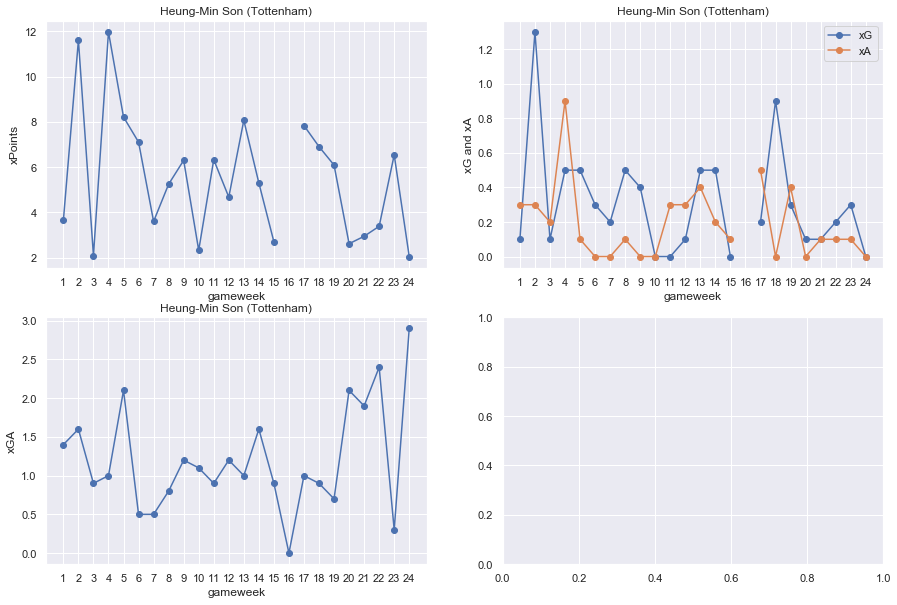

In [14]:
# find player index
name_string = 'Son'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 251

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Fode')]

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week23,cleansheet_week24,...,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
284,84.062755,4.381995,5,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,12,327,NaN,NaN,9.175708,6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,0.1,NaN,NaN,0.0,NaN,0.0,NaN,0.5,0.1,0.6,0.4,0.2,-0.1,NaN,0.3,0.3,0.0,0.2,0.6,0.3,0.0,NaN,0.0,9.382684,NaN,3.090119,NaN,NaN,2.97032,NaN,1.0,NaN,10.764304,6.17032,7.949329,6.367879,2.0,2.918731,NaN,10.652895,9.382684,2.074274,3.501897,6.697604,2.5,1.0,NaN,1.0,0
350,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
my_starting11 = [12,232,558,277,271,302,37,284,251,202,437]
my_subs = [213,506,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,22.068966,5.8,4.737371,6.091122,5.084817,4.669397,4.792363,2.057782
232,Chilwell,Chelsea,59,18.125000,4.8,4.307920,5.094698,3.199165,4.568976,4.315038,1.773542
558,Coufal,West Ham,47,20.000000,4.0,4.106029,4.165447,4.268688,4.278376,3.846320,1.893970
277,Cancelo,Manchester City,61,18.888889,5.4,5.364723,3.796575,4.601109,5.046428,5.253873,2.172113
271,Gündogan,Manchester City,61,18.088235,6.8,5.842835,6.974271,6.782841,5.346999,5.656153,2.365695
302,Fernandes,Manchester Utd,115,24.054054,7.4,6.676205,6.915813,6.831543,7.315301,6.045379,1.968705
37,Grealish,Aston Villa,78,21.864407,5.9,5.154525,4.022978,4.345106,5.052461,5.221151,1.845616
284,Foden,Manchester City,61,19.183673,4.9,4.381995,4.990862,5.083826,4.077332,4.268321,1.774218
251,Mané,Liverpool,118,20.980392,5.1,5.634698,7.881272,5.816691,5.941097,5.723509,1.640324



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,22.250000,4.0,3.439654,3.989176,4.375073,3.773711,3.482907,1.586594
506,Wilson,Newcastle Utd,66,21.090909,5.5,5.000470,5.449115,3.744051,4.736344,4.926958,1.946430
200,Dallas,Leeds United,49,22.926829,4.1,3.026493,3.667212,3.915118,3.301095,2.997113,1.367230
146,Mitchell,Crystal Palace,39,11.785714,2.8,2.668970,1.221194,3.133596,2.517505,2.898903,1.351486


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)